# Statistical distance scale from Buciarelli & Stanghellini (2023)

https://doi.org/10.1051/0004-6361/202347519

https://ui.adsabs.harvard.edu/abs/2023A%26A...680A.104B/abstract

We want to look at the secondary dependence on ionized mass. Is it real, or is it just an effect of the distance uncertainty?

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from astroquery.vizier import Vizier
import astropy.units as u
from astropy.table import QTable

In [2]:
sns.set_color_codes()

## Get the catalogs for the paper from Vizier

In [3]:
vizier = Vizier()

In [4]:
vizier.ROW_LIMIT = -1
catalogs = vizier.get_catalogs("J/A+A/680/A104")
catalogs

TableList with 4 tables:
	'0:J/A+A/680/A104/table1' with 11 column(s) and 401 row(s) 
	'1:J/A+A/680/A104/table3' with 15 column(s) and 843 row(s) 
	'2:J/A+A/680/A104/table4' with 11 column(s) and 320 row(s) 
	'3:J/A+A/680/A104/table5' with 11 column(s) and 320 row(s) 

We want Table 1, which has the calibration sample.

In [5]:
tab = QTable(catalogs[0]) 
tab

PNG,GaiaDR3,AName,omegac,e_omegac,theta,logF(Hb),e_logF(Hb),c,e_c,logMi
,,,mas,mas,arcsec,log(mW.m**-2),log(mW.m**-2),,,log(solMass)
str10,int64,str11,float64,float64,float64,float32,float32,float64,float32,float64
000.1+17.2,4130784921205604736,PC12,0.108852,0.081015,1.1245,-11.91,0.00,0.700000,0.10,-1.198275
000.1-05.6,4049045783774253696,H2-40,0.361548,0.326368,8.7950,-13.20,0.40,0.731383,0.10,-1.761370
000.3+12.2,4126115570219432448,IC4634,0.414256,0.052775,5.8150,-10.88,0.01,0.550000,0.06,-1.175168
000.4-02.9,4056250956464755712,M3-19,0.386062,0.230746,3.5000,-12.90,0.20,1.392788,0.10,-2.083465
000.7-03.7,4050168629923554944,M3-22,1.408490,0.365387,3.2000,-12.61,0.01,0.960000,0.10,-3.459038
000.9-02.0,4056540677880158208,Bl3-13,0.188226,0.222946,2.6000,-13.80,0.30,2.225771,0.10,-1.386239
000.9-04.8,4049925328633027712,M3-23,0.266429,0.466980,6.0000,-12.20,0.20,1.034149,0.10,-0.995148
001.7-04.4,4050131349653595392,H1-55,0.073096,1.049650,5.0000,-12.56,0.01,1.141267,0.10,-0.071144


## Calculate distances and nebular radius and extinction-corrected surface brightness

In [6]:
tab["D"] = tab["omegac"].to(u.kpc, equivalencies=u.parallax())
tab["logR"] = np.log10(np.sin(tab["theta"]) * tab["D"].to_value(u.pc))

In [7]:
F = (10**(tab["logF(Hb)"].value + tab["c"])) * u.erg / u.cm ** 2 / u.s
Omega = np.pi * tab["theta"] ** 2

In [8]:
F

<MaskedQuantity [6.16595219e-12, 3.39925066e-13, 4.67735018e-11,
                 3.11020046e-12, 2.23872291e-12, 2.66545165e-12,
                 6.82573134e-12, 3.81299803e-12, 3.18133881e-12,
                 7.62780564e-12, 1.49529328e-11, 1.44543977e-11,
                 3.16227988e-10, 1.65645168e-11, 5.75614611e-12,
                 9.54992502e-11, 5.06152815e-12, 5.41120136e-13,
                 3.06478054e-11, 2.24582506e-13, 2.23871917e-11,
                 2.81838417e-12, 7.84049746e-12, 5.64332915e-13,
                 2.31206377e-12, 5.98626848e-12, 1.92750801e-11,
                 2.12448964e-12, 8.57623770e-14, 1.73779961e-11,
                 4.92170060e-11, 3.80933930e-12, 2.37650646e-11,
                 1.31825674e-11, 6.05278102e-12, 6.23570966e-12,
                 9.12011080e-12, 2.49920568e-12, 4.07380493e-12,
                 3.89045350e-11, 2.43672770e-12, 6.32063920e-13,
                 8.70964202e-11, 9.99999297e-12, 2.66891752e-12,
                 2.566225

In [9]:
Omega

<MaskedQuantity [3.97254470e+00, 2.43008553e+02, 1.06230521e+02,
                 3.84845100e+01, 3.21699088e+01, 2.12371663e+01,
                 1.13097336e+02, 7.85398163e+01, 7.06858347e+00,
                 1.25663706e+01, 9.54978900e+00, 4.30084034e+01,
                 8.47540830e+02, 1.96349541e+01, 2.82743339e+01,
                 5.92829089e+01, 1.47049541e+01, 6.15752160e+00,
                 1.13097336e+02, 4.77836243e+01, 2.62734614e+02,
                 6.55113873e+01, 5.80880482e+01, 1.32732290e+02,
                 3.69836141e+02, 4.07150408e+01, 8.17128249e+01,
                 5.02654825e+01, 5.28101725e+01, 4.51635674e+00,
                 1.38544236e+01, 1.66190251e+01, 3.21699088e+01,
                 1.13411495e+01, 2.12371663e+01, 8.04247719e+00,
                 1.25663706e+01, 3.84845100e+01, 2.74352223e+02,
                 1.49571226e+02, 4.24291723e+01, 7.85398163e+01,
                 5.80880482e+01, 2.64207942e+01, 2.58049038e+01,
                 2.544690

In [10]:
tab["logS(Hb)"] =  np.log10((F / Omega).value)

## Subset with parallax error < 20%

Relative parallax error. Note that table says `omega` when it means `varpi`

In [11]:
tab["sig_p/p"] = tab["e_omegac"] / tab["omegac"]
tab["log(sig_p/p)"] = np.log10(tab["e_omegac"] / tab["omegac"])


In [12]:
m20 = tab["e_omegac"] < 0.2 * tab["omegac"]
m10 = tab["e_omegac"] < 0.1 * tab["omegac"]

In [13]:
tab[m20]

PNG,GaiaDR3,AName,omegac,e_omegac,theta,logF(Hb),e_logF(Hb),c,e_c,logMi,D,logR,logS(Hb),sig_p/p,log(sig_p/p)
,,,mas,mas,arcsec,log(mW.m**-2),log(mW.m**-2),,,log(solMass),kpc,,,,
str10,int64,str11,float64,float64,float64,float32,float32,float64,float32,float64,float64,float64,float64,float64,float64
000.3+12.2,4126115570219432448,IC4634,0.414256,0.052775,5.8150,-10.88,0.01,0.550000,0.06,-1.175168,2.413966,-1.1671,-12.356249425263986,0.127397,-0.894841
002.0-06.2,4049596604655713664,M2-33,0.283392,0.051525,2.0000,-11.60,0.30,0.482400,0.10,-1.830213,3.528681,-1.4658,-12.216810245491823,0.181815,-0.740370
002.4+05.8,4111368477921050368,NGC6369,0.962354,0.060272,16.4250,-11.32,0.03,1.820000,0.10,-0.806347,1.039119,-1.0823,-12.42816032398199,0.062630,-1.203219
002.4-03.7,4050798924999155456,M1-38,0.162975,0.031229,2.5000,-12.01,0.07,1.229179,0.10,-0.928786,6.135910,-1.1286,-12.073851118920045,0.191618,-0.717563
003.3-04.6,4050854450293755136,Ap1-12,0.157078,0.024909,6.0000,-11.40,0.20,0.886399,0.10,-0.505685,6.366264,-0.7324,-12.567052991991694,0.158577,-0.799759
009.6+14.8,4141505881131938560,NGC6309,0.408021,0.078305,6.9000,-11.24,0.01,0.830000,0.10,-0.979074,2.450854,-1.0863,-12.584847825286808,0.191914,-0.716893
010.8-01.8,4094354493205707392,NGC6578,0.412581,0.048524,4.3000,-11.57,0.03,1.510000,0.04,-1.300516,2.423766,-1.2965,-11.824086478677525,0.117611,-0.929553
011.3-09.4,4078224382749921024,My121,0.256107,0.040689,0.9000,-11.30,0.07,0.709295,0.10,-2.001918,3.904618,-1.7686,-10.996340082307645,0.158875,-0.798944


## Radius–surface brightness relation

log RPN = (−0.242 ±0.0042) ×log S Hβ−(4.2 ±0.057). 


In [14]:
def logR_logSB_fit(logSB):
    logSB = np.asarray(logSB)
    return -0.242 * logSB - 4.2

This is with all the sources.

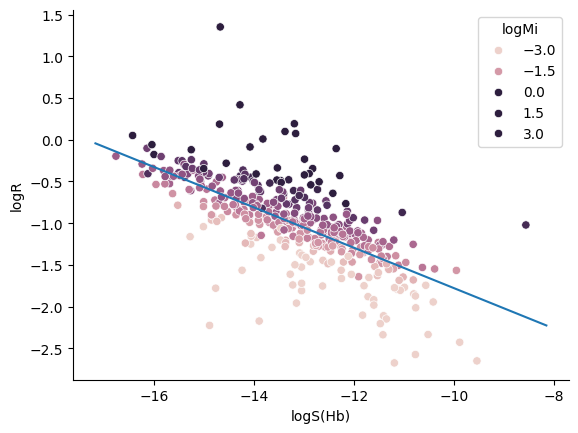

In [15]:
# sns.scatterplot(data=tab[m20].to_pandas(), x="logS(Hb)", y="logR", hue="logMi")
sns.scatterplot(data=tab.to_pandas(), x="logS(Hb)", y="logR", hue="logMi", hue_norm=(-2, 0))
sns.despine()

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
ax.plot(xlim, logR_logSB_fit(xlim))


Just sources with relative parallax error < 20%

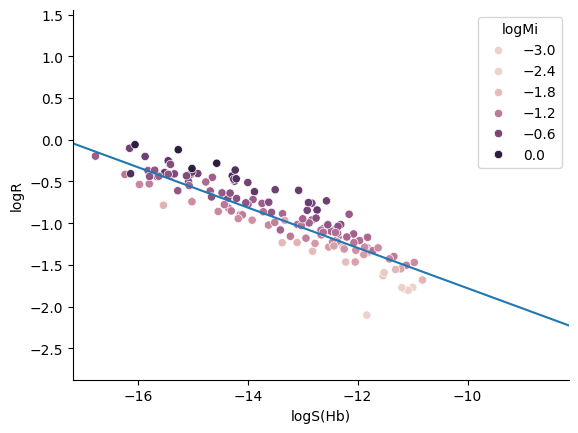

In [16]:
# sns.scatterplot(data=tab[m20].to_pandas(), x="logS(Hb)", y="logR", hue="logMi")
sns.scatterplot(data=tab[m20].to_pandas(), x="logS(Hb)", y="logR", hue="logMi", hue_norm=(-2, 0))
sns.despine()
ax = plt.gca()
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
ax.plot(xlim, logR_logSB_fit(xlim))

Just sources with relative parallax error < 10%

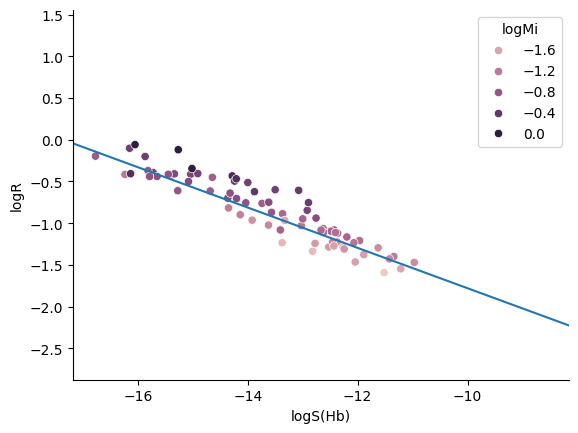

In [17]:
# sns.scatterplot(data=tab[m20].to_pandas(), x="logS(Hb)", y="logR", hue="logMi")
sns.scatterplot(data=tab[m10].to_pandas(), x="logS(Hb)", y="logR", hue="logMi", hue_norm=(-2, 0))
sns.despine()
ax = plt.gca()
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
ax.plot(xlim, logR_logSB_fit(xlim))

## Histogram of ionized mass

<Axes: xlabel='logMi', ylabel='Count'>

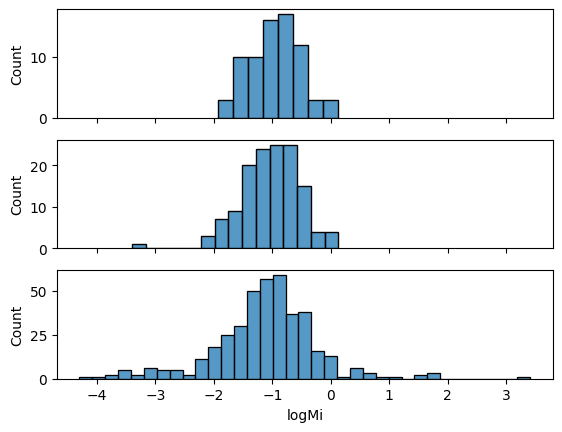

In [18]:
fig, axes = plt.subplots(3, 1, sharex=True)
sns.histplot(data=tab[m10].to_pandas(), x="logMi", ax=axes[0])
sns.histplot(data=tab[m20].to_pandas(), x="logMi", ax=axes[1])
sns.histplot(data=tab.to_pandas(), x="logMi", ax=axes[2])

### Equation for calculating ionized mass

From 
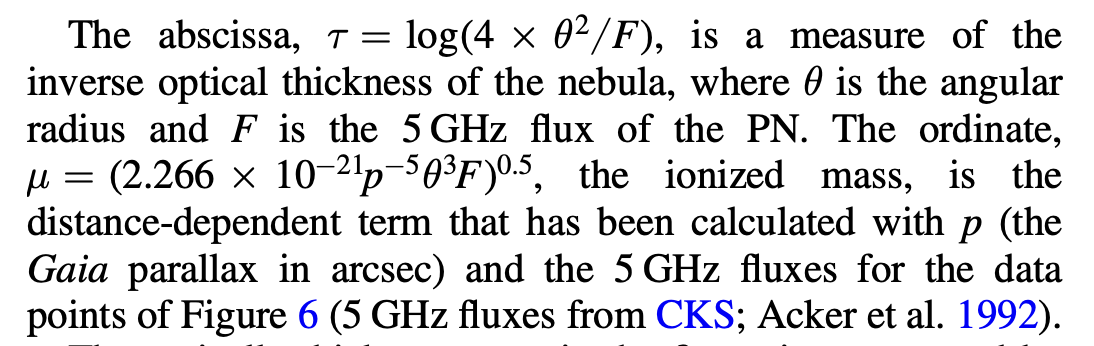

## Histogram of R / R_fit

In [19]:
tab["d logR"] = tab["logR"] - logR_logSB_fit(tab["logS(Hb)"])

/var/folders/0q/3pcjvc3n6sn2wk6g8ck6ry300000gn/T/ipykernel_98933/1110953106.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


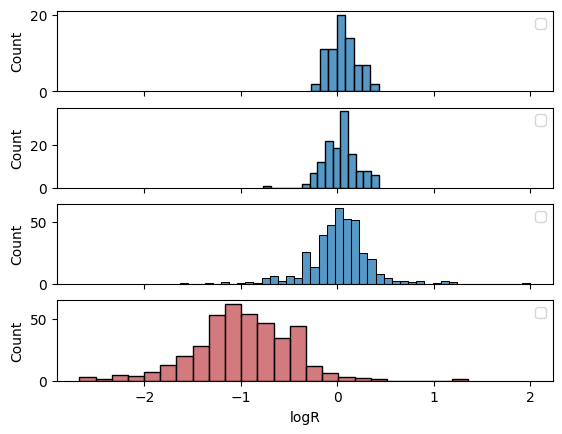

In [20]:
fig, axes = plt.subplots(4, 1, sharex=True)
sns.histplot(data=tab[m10].to_pandas(), x="d logR", ax=axes[0])
sns.histplot(data=tab[m20].to_pandas(), x="d logR", ax=axes[1])
sns.histplot(data=tab.to_pandas(), x="d logR", ax=axes[2])
sns.histplot(data=tab.to_pandas(), x="logR", ax=axes[3], color="r")
for ax in axes:
    ax.legend()

### Deviation in radius versus nominal parallax error



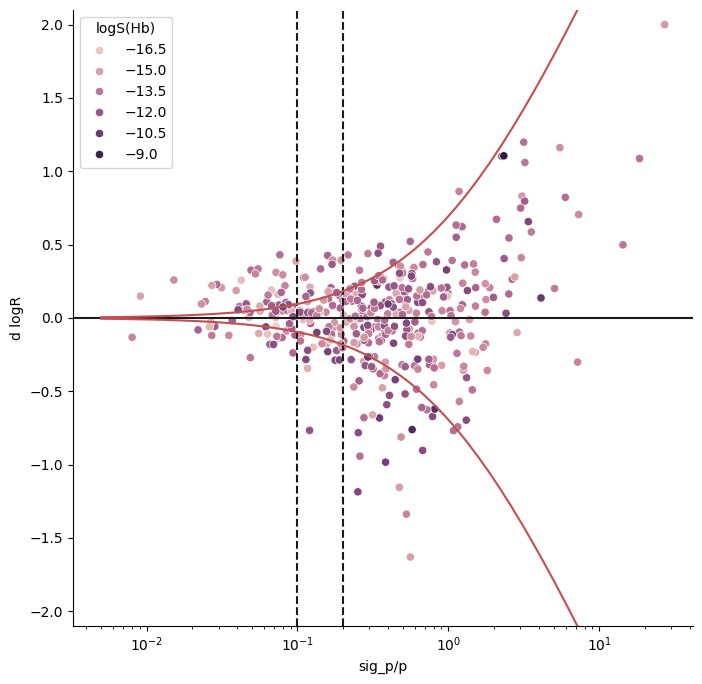

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=tab.to_pandas(), x="sig_p/p", y="d logR", hue="logS(Hb)", ax=ax)
ax.set_xscale("log")
ax.axhline(0, c="k")
ax.axvline(0.1, c="k", linestyle="dashed")
ax.axvline(0.2, c="k", linestyle="dashed")
# Plot predicted contribution of parallax error to deviation in log(R)
xx = np.geomspace(0.005, 20.0)
yy = np.log(1 + xx)
ax.plot(xx, yy, c="r")
ax.plot(xx, -yy, c="r")
ax.set_ylim(-2.1, 2.1)
sns.despine()

Version showing running std estimates (chatgpt helped with this)

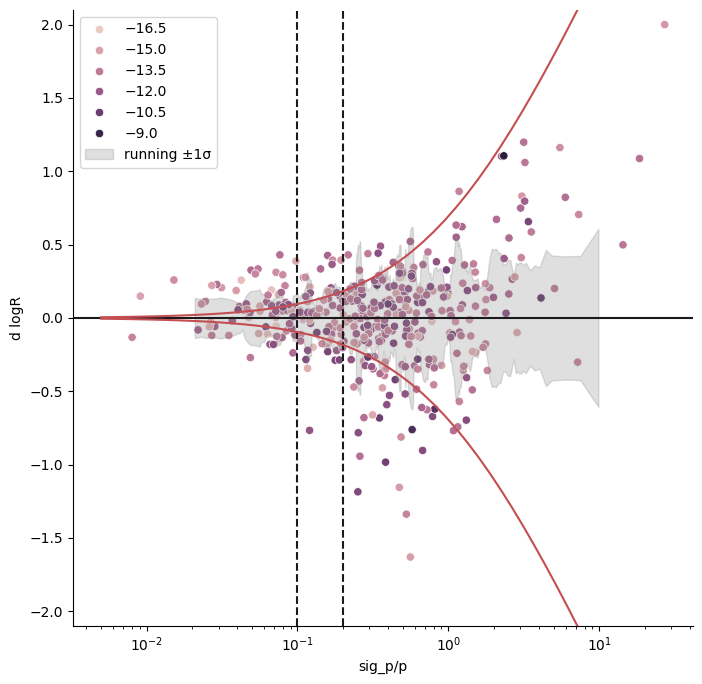

In [22]:
df = tab.to_pandas()

x = df["sig_p/p"].to_numpy()
y = df["d logR"].to_numpy()

# ---- 1. Sort by x -------------------------------------------------
order = np.argsort(x)
x_sorted = x[order]
y_sorted = y[order]

# ---- 2. Choose window size (e.g., 50 points) ----------------------
N = 10

# ---- 3. Compute running (adaptive) std -----------------------------
x_mid = np.convolve(x_sorted, np.ones(N)/N, mode="valid")
y_std = np.array([np.std(y_sorted[i:i+N]) for i in range(len(y_sorted)-N+1)])

# optionally median instead of mean for x-mid:
#x_mid = np.array([np.median(x_sorted[i:i+N]) for i in range(len(x_sorted)-N+1)])

# ---- 4. Plot it ---------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(
    data=df, x="sig_p/p", y="d logR", hue="logS(Hb)", ax=ax
)

ax.set_xscale("log")
ax.axhline(0, c="k")
ax.axvline(0.1, c="k", ls="--")
ax.axvline(0.2, c="k", ls="--")

# Predicted parallax‐error curve
xx = np.geomspace(0.005, 20.0)
yy = np.log(1 + xx)
ax.plot(xx,  yy,  c="r")
ax.plot(xx, -yy,  c="r")

# ---- Add ±1 sigma envelope ----------------------------------------
ax.fill_between(
    x_mid, -y_std, y_std,
    color="gray", alpha=0.25, label="running ±1σ"
)

ax.set_ylim(-2.1, 2.1)
sns.despine()
ax.legend()

In [23]:
x_mid[:10], y_std[:10]

(array([0.02089002, 0.0229219 , 0.02493493, 0.02655763, 0.02787438,
        0.02925935, 0.030735  , 0.03216891, 0.03363234, 0.03516414]),
 array([0.13616749, 0.12825333, 0.13638004, 0.1293553 , 0.13364837,
        0.13401852, 0.13994884, 0.13556172, 0.13278982, 0.12818252]))

## Ionized mass versus deviation from radius--SB trend

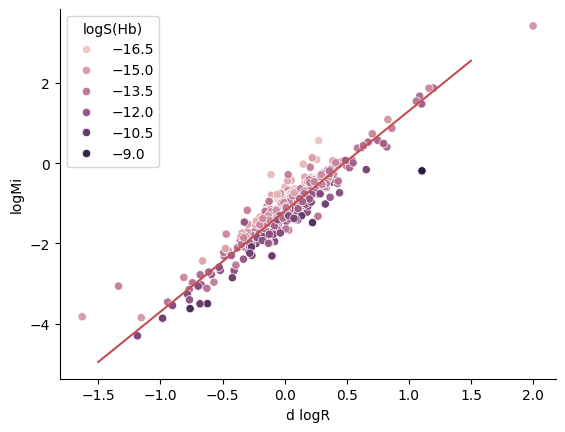

In [24]:
sns.scatterplot(data=tab.to_pandas(), x="d logR", y="logMi", hue="logS(Hb)")
ax = plt.gca()
xx = np.array([-1.5, 1.5])
ax.plot(xx, 2.5 * xx - 1.2, c="r")
sns.despine()

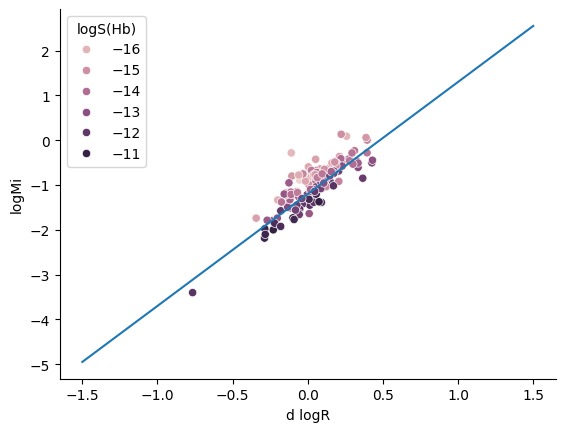

In [25]:
sns.scatterplot(data=tab[m20].to_pandas(), x="d logR", y="logMi", hue="logS(Hb)")
ax = plt.gca()
xx = np.array([-1.5, 1.5])
ax.plot(xx, 2.5 * xx - 1.2)
sns.despine()


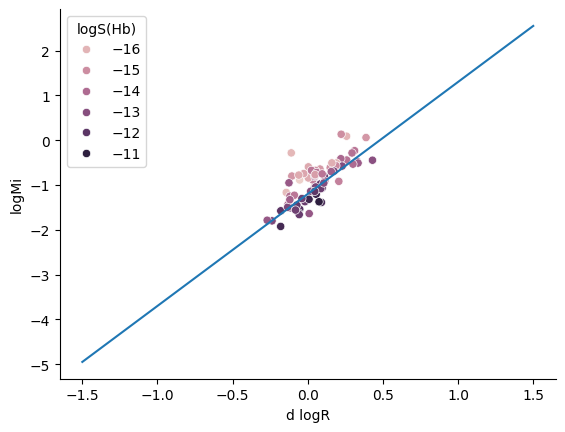

In [26]:
sns.scatterplot(data=tab[m10].to_pandas(), x="d logR", y="logMi", hue="logS(Hb)")
ax = plt.gca()
xx = np.array([-1.5, 1.5])
ax.plot(xx, 2.5 * xx - 1.2)
sns.despine()


## Fit a mean trend in M_i versus Surface Brightness

First guess at the linear trend

In [27]:
def logMi_logSB_fit(SB):
    SB = np.asarray(SB)
    return -1.0 - 0.15 * (SB + 14.0) 

But better to fit the data. I am weighting by the parallax error

In [102]:
pfit_logMi_logSB = np.polynomial.Polynomial.fit(
    tab[m20]["logS(Hb)"], 
    tab[m20]["logMi"], 
    deg=1,
    w=1/(0.1 + tab[m20]["sig_p/p"]),
)
pfit_logMi_logSB

Polynomial([-0.95720113, -0.57943138], domain=[-16.7689039, -10.8199354], window=[-1.,  1.])

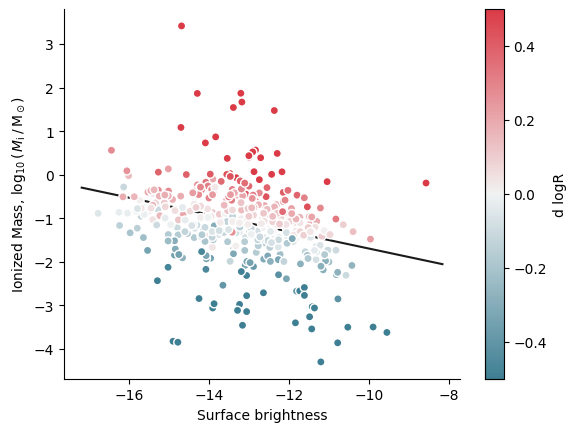

In [116]:
fig, ax = plt.subplots()

points = ax.scatter(
    tab["logS(Hb)"],
    tab["logMi"],
    c=tab["d logR"],
    s=35,
    edgecolors="w",
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    norm=plt.Normalize(-0.5, 0.5),
)

cbar = fig.colorbar(points, ax=ax)
cbar.set_label("d logR")

xx = ax.get_xlim()
ax.plot(xx, pfit_logMi_logSB(np.array(xx)), color="k", zorder=-1)

ax.set_xlabel("Surface brightness")
ax.set_ylabel(r"Ionized Mass, $\log_{10} (\, M_\mathrm{i} \, / \,  \mathrm{M_\odot})$")

sns.despine()

## Deviation of M_i from mean trend

We want to know whether this can be explained entirely by the uncertainty in the distance.

In [105]:
# tab["d logMi"] = tab["logMi"].value - logMi_logSB_fit(tab["logS(Hb)"])
tab["d logMi"] = tab["logMi"].value - pfit_logMi_logSB(tab["logS(Hb)"])

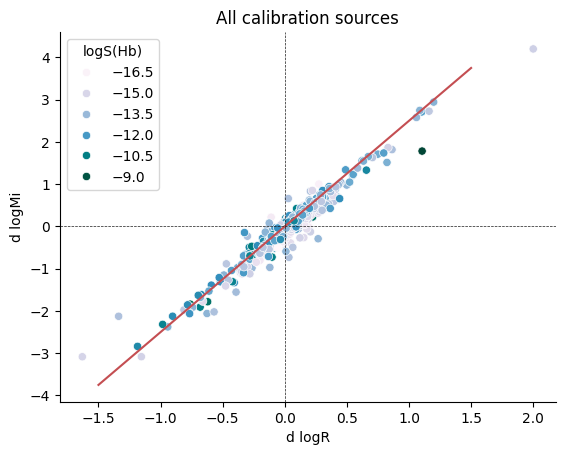

In [106]:
sns.scatterplot(data=tab.to_pandas(), x="d logR", y="d logMi", hue="logS(Hb)", palette="PuBuGn")
ax = plt.gca()
xx = np.array([-1.5, 1.5])
ax.plot(xx, 2.5 * xx, c="r")
ax.axhline(0, lw=0.5, ls="dashed", c="k")
ax.axvline(0, lw=0.5, ls="dashed", c="k")
ax.set_title("All calibration sources")
sns.despine()

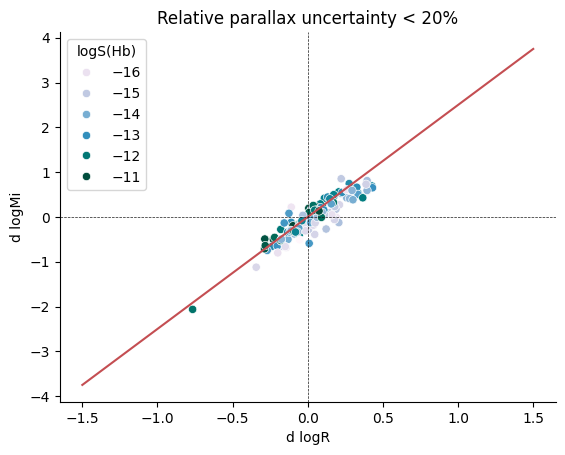

In [107]:
sns.scatterplot(data=tab[m20].to_pandas(), x="d logR", y="d logMi", hue="logS(Hb)", palette="PuBuGn")
ax = plt.gca()
xx = np.array([-1.5, 1.5])
ax.plot(xx, 2.5 * xx, c="r")
ax.axhline(0, lw=0.5, ls="dashed", c="k")
ax.axvline(0, lw=0.5, ls="dashed", c="k")
ax.set_title("Relative parallax uncertainty < 20%")

sns.despine()

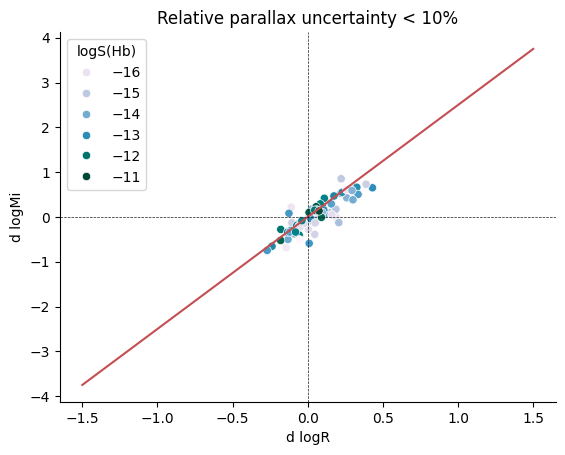

In [108]:
sns.scatterplot(data=tab[m10].to_pandas(), x="d logR", y="d logMi", hue="logS(Hb)", palette="PuBuGn")
ax = plt.gca()
xx = np.array([-1.5, 1.5])
ax.plot(xx, 2.5 * xx, c="r")
ax.axhline(0, lw=0.5, ls="dashed", c="k")
ax.axvline(0, lw=0.5, ls="dashed", c="k")
ax.set_title("Relative parallax uncertainty < 10%")

sns.despine()

### Combined plot of all sources and low-error sources

<Axes: xlabel='Probability', ylabel='d logMi'>

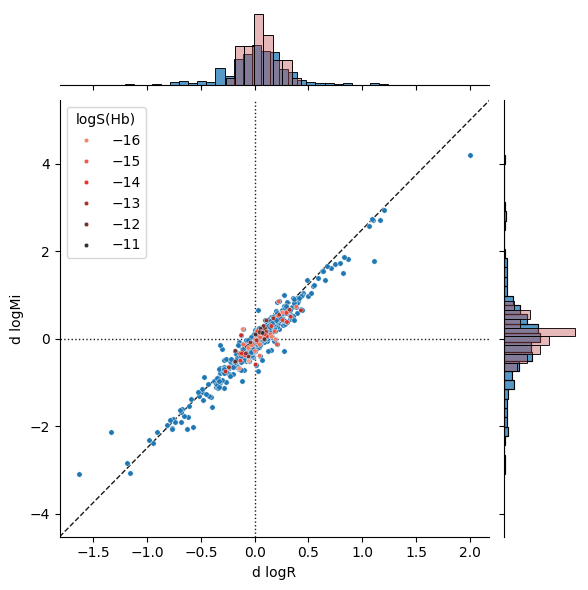

In [109]:
m = m10
g = sns.jointplot(data=tab.to_pandas(), x="d logR", y="d logMi", s=15, marginal_kws=dict(stat="probability"))
sns.scatterplot(data=tab[m].to_pandas(), x="d logR", y="d logMi", hue="logS(Hb)", s=10, palette="Reds_d", ax=g.ax_joint)
xx = np.array([*g.ax_joint.get_xlim()])
yy = 2.5 * xx
g.ax_joint.plot(xx, yy, c="k", lw=1, ls="dashed", zorder=-1)
g.ax_joint.axhline(0, lw=1, c="k", ls="dotted", zorder=-1)
g.ax_joint.axvline(0, lw=1, c="k", ls="dotted", zorder=-1)
g.ax_joint.set_xlim(*xx)
g.ax_joint.set_ylim(*yy)
sns.histplot(ax=g.ax_marg_x, x="d logR", data=tab[m].to_pandas(), color="r", alpha=0.4, stat="probability")
sns.histplot(ax=g.ax_marg_y, y="d logMi", data=tab[m].to_pandas(), color="r", alpha=0.4, stat="probability")

## Double-check with a distance-independent "mass"

In [110]:
tab["logMM"] = np.log10(np.sqrt(F.value * tab["theta"].value ** 3))

<Axes: xlabel='logMM', ylabel='Count'>

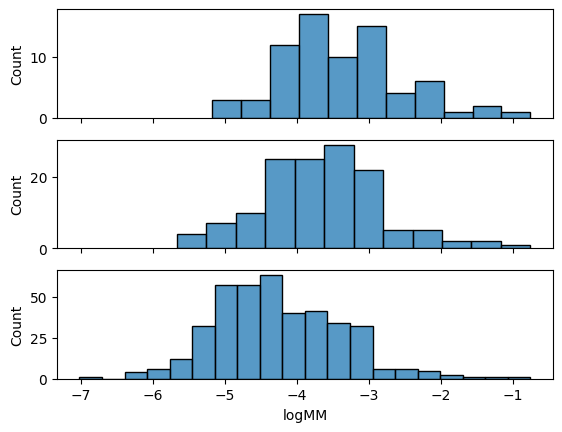

In [111]:
fig, axes = plt.subplots(3, 1, sharex=True)
sns.histplot(data=tab[m10].to_pandas(), x="logMM", ax=axes[0])
sns.histplot(data=tab[m20].to_pandas(), x="logMM", ax=axes[1])
sns.histplot(data=tab.to_pandas(), x="logMM", ax=axes[2])

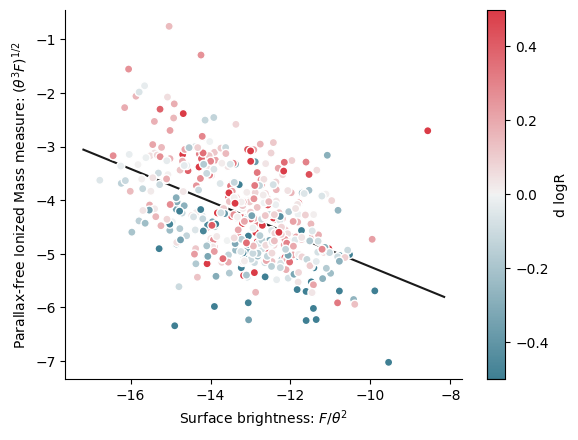

In [95]:
fig, ax = plt.subplots()

pfit_logMM_logSB = np.polynomial.Polynomial.fit(tab["logS(Hb)"], tab["logMM"], deg=1)

points = ax.scatter(
    tab["logS(Hb)"],
    tab["logMM"],
    c=tab["d logR"],
    s=35,
    edgecolors="w",
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    norm=plt.Normalize(-0.5, 0.5),
)

cbar = fig.colorbar(points, ax=ax)
cbar.set_label("d logR")
xx = ax.get_xlim()
ax.plot(xx, pfit_logMM_logSB(np.array(xx)), color="k", zorder=-1)
ax.set_xlabel(r"Surface brightness: $F / \theta^2$")
ax.set_ylabel(r"Parallax-free Ionized Mass measure: $(\theta^3 F)^{1/2}$")

sns.despine()

In [114]:
tab["d logMM"] = tab["logMM"] - pfit_logMM_logSB(tab["logS(Hb)"])

<Axes: xlabel='Probability', ylabel='d logMM'>

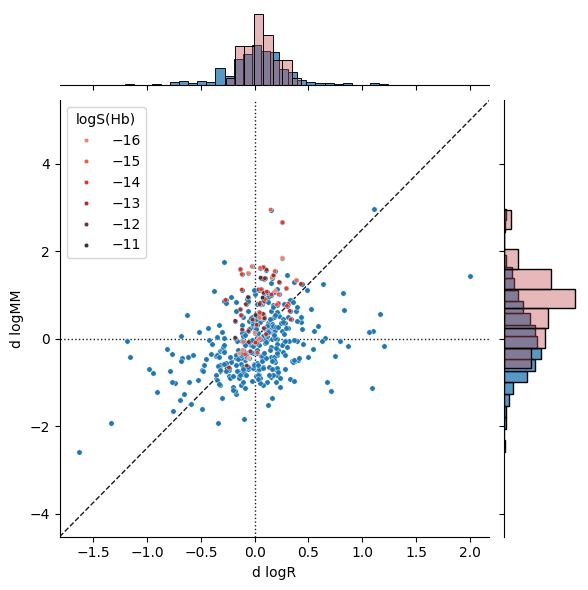

In [115]:
m = m10
g = sns.jointplot(data=tab.to_pandas(), x="d logR", y="d logMM", s=15, marginal_kws=dict(stat="probability"))
sns.scatterplot(data=tab[m].to_pandas(), x="d logR", y="d logMM", hue="logS(Hb)", s=10, palette="Reds_d", ax=g.ax_joint)
xx = np.array([*g.ax_joint.get_xlim()])
yy = 2.5 * xx
g.ax_joint.plot(xx, yy, c="k", lw=1, ls="dashed", zorder=-1)
g.ax_joint.axhline(0, lw=1, c="k", ls="dotted", zorder=-1)
g.ax_joint.axvline(0, lw=1, c="k", ls="dotted", zorder=-1)
g.ax_joint.set_xlim(*xx)
g.ax_joint.set_ylim(*yy)
sns.histplot(ax=g.ax_marg_x, x="d logR", data=tab[m].to_pandas(), color="r", alpha=0.4, stat="probability")
sns.histplot(ax=g.ax_marg_y, y="d logMM", data=tab[m].to_pandas(), color="r", alpha=0.4, stat="probability")

In [104]:
pfit_logMM_logSB.coef, pfit_logMi_logSB.coef

(array([-4.43144603, -1.24835405]), array([-0.95720113, -0.57943138]))

In [ ]:
pfit_logMM_logSB.

In [34]:
sns.choose_colorbrewer_palette("sequential")

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

In [35]:
sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)]

In [36]:
tab.to_pandas().describe()

,GaiaDR3,omegac,e_omegac,theta,logF(Hb),e_logF(Hb),c,e_c,logMi,D,logR,logS(Hb),sig_p/p,log(sig_p/p),d logR,d logMi
count,4.010000e+02,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,4.155718e+18,0.474256,0.181472,16.417971,-12.011322,0.132768,0.971685,0.111870,-1.120822,4.942971,-0.985865,-13.206494,0.762742,-0.493915,0.018163,-0.001796
std,1.689088e+18,0.532419,0.260315,34.896956,0.888667,0.135978,0.820351,0.100617,0.894360,7.914043,0.504652,1.392581,1.961790,0.538614,0.358286,0.853472
min,5.086503e+16,0.009627,0.010693,0.100000,-14.200000,0.000000,-0.476207,0.010000,-4.300743,0.198594,-2.675254,-16.768904,0.008026,-2.095480,-1.629852,-2.964495
25%,3.103708e+18,0.188602,0.048925,2.959500,-12.600000,0.020000,0.386807,0.100000,-1.495334,1.682142,-1.268001,-14.193962,0.134433,-0.871496,-0.125169,-0.367761
50%,4.156238e+18,0.319967,0.085763,6.000000,-12.050000,0.070000,0.790000,0.100000,-1.069767,3.125322,-0.985522,-13.101270,0.330728,-0.480529,0.036484,0.066966
75%,5.794858e+18,0.594480,0.205274,16.000000,-11.460000,0.200000,1.390000,0.100000,-0.675043,5.302171,-0.639014,-12.225286,0.666483,-0.176211,0.186532,0.416225
max,6.907823e+18,5.035410,2.054630,402.000000,-9.370000,0.500000,7.192899,1.200000,3.416269,103.874520,1.353282,-8.567209,27.150863,1.433784,2.000190,4.313939


In [37]:
sns.histplot?

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
discrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mas

<Axes: >

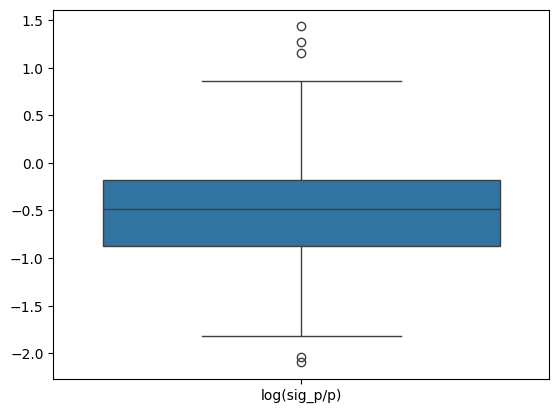

In [38]:
sns.boxplot(data=tab[["log(sig_p/p)"]].to_pandas())